In [1]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud
import numpy as np
import nltk
from nltk import ngrams
from gensim import corpora, models

from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis # Plotting tools
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
# Filter out the DeprecationWarning for ROTATE_90
warnings.filterwarnings("ignore", category=DeprecationWarning)

import re
import string
import os

In [2]:
# data path to load articles

# Get the current directory of the Python script
current_directory = os.path.dirname(os.path.abspath("Final-miniproject3-code.py"))

# Specify the name of the folder containing articles
articles_folder = "Articles"

# Create the full path to the articles folder
dir_path = os.path.join(current_directory, articles_folder)

# Printing the Article path
print("Path to articles folder:", dir_path)


Path to articles folder: /Users/samarasimhareddypunnam/Desktop/Fall'23/TextMining/Text_Mining/Articles


Way to build a corpus (e.g. load the data as large character, split up the input data into individual articles and build a corpus object containing all splitted articles)

In [3]:
folder_out = 'New_Articles_folder'


if not os.path.exists(folder_out):
    os.makedirs(folder_out)

end_pattern = r'Document\s+\w+'

file_names = [file_name for file_name in os.listdir(dir_path) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(dir_path, file_name), 'r', encoding='latin-1') as file:
        file_contents = file.read()
        
    articles = re.split(end_pattern, file_contents) #splitting into articles based on end pattern
    
    # Write those splitted articles into separate text files and store in output folder defined above
    for i, article in enumerate(articles):
        article_filename = f'{os.path.splitext(file_name)[0]}_article_{i + 1}.txt'
        
        with open(os.path.join(folder_out, article_filename), 'w', encoding='latin-1') as output_file:
            _=output_file.write(article)

clean up the corpus, make sure you separate meta-data from the actual articles

In [4]:
import os

def remove_metadata_and_save(dir_path):
    for filename in os.listdir(dir_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(dir_path, filename)
            with open(file_path, 'r', encoding='latin-1') as f:
                article = f.read()

            index_start = article.find('By ')
            index_end = article.find('Reserved.')
            if index_start != -1 and index_end != -1:
                metadata = article[index_start:index_end + 9] + '\n'
            
                # Replace metadata in the article with an empty string
                modified_article = article[:index_start] + article[index_end + 10:] + '\n\n\n'

                # Save the modified content back to the original file
                with open(file_path, 'w', encoding='latin-1') as f:
                    f.write(modified_article)

# Example usage:
remove_metadata_and_save(folder_out)


In [5]:
file_names = [file_name for file_name in os.listdir(folder_out) if file_name.endswith('.txt')]
articles = []
for file_name in file_names:
    with open(os.path.join(folder_out, file_name), 'r', encoding='latin-1') as file:
        file_contents = file.read()
        articles.append(file_contents)

In [6]:
# Function to preprocess the loaded data
def preprocess_data(article_files):
    preprocess_articles = []

    # Iterate through each article in the current file
    for article in article_files:
        text = re.sub(r"\s+", " ", article)
        # Remove numbers and punctuation
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove newlines
        text = re.sub(r'\n', ' ', text)
        
        # Remove digits
        text = re.sub(r'\d+', '', text)
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text)
        # Make all characters lowercase
        text = text.lower()

        # Tokenize text into words
        tokens = word_tokenize(text)
        # Remove stop words (common words with little meaning such as "the" or "a")
        stop_words = set(stopwords.words("english"))
        stop_words.add('new')
        stop_words.add('would')
        stop_words.add('one')
        stop_words.add('said')
        stop_words.add('mr')
        stop_words.add('u')
        # Remove any remaining short words and lemmatize 
        tokens = [token for token in tokens if token not in stop_words]
        tokens = [token for token in tokens if len(token) > 1 or token in {"i", "a"}]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        tokens = [token for token in tokens if token != "u"]
        preprocess_articles.append(tokens)
    return preprocess_articles


In [7]:
from itertools import chain
# Returns the list of most frequent words as per the requirement
def freq_Distribution(processed_tokens, top_word_count):
    flattened_tokens = list(chain.from_iterable(processed_tokens))
    top_words = FreqDist(flattened_tokens).most_common(top_word_count)
    print(top_words)
    return top_words
    # top_words = FreqDist(processed_tokens).most_common(top_word_count)
    # print(top_words)
    # return top_words

In [8]:
def corpus_word_clouds(processed_tokens,top_word_count):
    flattened_tokens = list(chain.from_iterable(processed_tokens))
    word_freq = FreqDist(flattened_tokens).most_common(top_word_count)
    word_freq_dict = {word: freq for word, freq in word_freq}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

extract features

create summaries on the features as exploration

create some plots for exploration

In [9]:
tokens = preprocess_data(articles) # runs preprocess function

[('state', 10514), ('trump', 7833), ('islamic', 6317), ('president', 4485), ('people', 4147), ('time', 4138), ('american', 4128), ('syria', 4084), ('attack', 3736), ('force', 3664), ('year', 3585), ('united', 3471), ('official', 3413), ('military', 3381), ('group', 3369), ('country', 3270), ('also', 3176), ('iraq', 3149), ('isi', 2843), ('government', 2797), ('like', 2661), ('city', 2562), ('syrian', 2436), ('say', 2428), ('day', 2347), ('last', 2291), ('could', 2289), ('iraqi', 2287), ('two', 2220), ('week', 2167)]


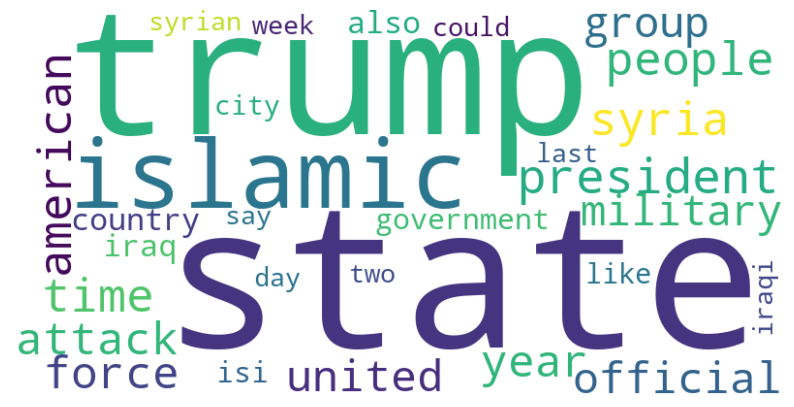

In [10]:
features = freq_Distribution(tokens, 30) # runs extraxt features function
corpus_word_clouds(tokens, 30) # runs plot features function

[('state', 10514), ('trump', 7833), ('islamic', 6317), ('president', 4485), ('people', 4147), ('time', 4138), ('american', 4128), ('syria', 4084), ('attack', 3736), ('force', 3664), ('year', 3585), ('united', 3471), ('official', 3413), ('military', 3381), ('group', 3369), ('country', 3270), ('also', 3176), ('iraq', 3149), ('isi', 2843), ('government', 2797), ('like', 2661), ('city', 2562), ('syrian', 2436), ('say', 2428), ('day', 2347), ('last', 2291), ('could', 2289), ('iraqi', 2287), ('two', 2220), ('week', 2167), ('world', 2152), ('think', 2151), ('security', 2143), ('many', 2090), ('right', 2042), ('administration', 2028), ('york', 1968), ('first', 1951), ('news', 1916), ('going', 1899), ('war', 1843), ('russia', 1816), ('house', 1807), ('even', 1800), ('get', 1745), ('killed', 1738), ('fighter', 1724), ('month', 1719), ('terrorist', 1693), ('back', 1683), ('way', 1649), ('may', 1616), ('militant', 1605), ('mosul', 1603), ('iran', 1562), ('leader', 1477), ('want', 1471), ('obama', 

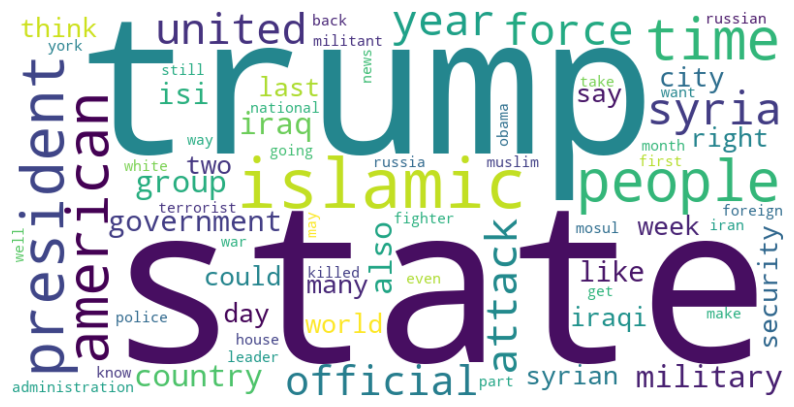

In [11]:
features = freq_Distribution(tokens, 70) # runs extraxt features function
corpus_word_clouds(tokens, 70) # runs plot features function

In [12]:
# Create Dictionary 
id2word = corpora.Dictionary(tokens)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tokens]

## Topic Modeling
create a topic model using your cleaned corpus 

In [13]:
def run_lda(texts, corpus, dictionary, num_topics, passes):
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=13)
    # Compute Perplexity
    Perplexity = lda_model.log_perplexity(corpus)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return lda_model, Perplexity, coherence_score

In [14]:
def topic_word_clouds(png_out,num_topics,passes,number,topic):
    words = {word[0]: word[1] for word in topic[1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Turn off the axis labels
    plt.title(f'Topic {i} Word Cloud')
    # Save figure as PNG file
    plt.savefig(f'{png_out}/lda_visualization_{num_topics}_topics_{passes}_passes_topic{i}.png')
    # Close the figure to prevent display
    plt.close()

re-run the topic modeling multiple times with different parameters and store summaries into output files

In [15]:
folder_out = 'output'
model_folder = 'model'


if not os.path.exists(folder_out):
    os.makedirs(folder_out)

if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Experiment with different parameters
num_topics_list = [5, 10, 15]
passes_list = [10, 20, 30]

for num_topics in num_topics_list:
    for passes in passes_list:
        lda_model, Perplexity, coherence_score = run_lda(tokens, corpus, id2word, num_topics, passes)
        # Save model
        lda_model.save(os.path.join(model_folder, f'lda_model_{num_topics}_topics_{passes}_passes.model'))
        
        # Store results in output files
        png_out = f'{folder_out}/topics_{num_topics}/passes_{passes}'
        if not os.path.exists(png_out):
            os.makedirs(png_out)
        output_file = f"{folder_out}/lda_output_{num_topics}_topics_{passes}_passes.txt"
        with open(output_file, 'w') as f:
            f.write(f"Number of Topics: {num_topics}\n")
            f.write(f"Number of Passes: {passes}\n")
            f.write(f"Perplexity: {Perplexity}\n")
            f.write(f"Coherence Score: {coherence_score}\n\n")
            
            topics = lda_model.show_topics(formatted=False, num_words=15)
            for i, topic in enumerate(topics, start=1):
                f.write(f"Topic {i}: {topic}\n")
                topic_word_clouds(png_out,num_topics, passes, i, topic)

In [16]:
model_names = [file_name for file_name in os.listdir(model_folder) if file_name.endswith('.model')]

discuss the different results in the context described in the overview statement


Peforming Perplexity and coherence score for all models

In [17]:
import json
from gensim import corpora, models

# Compute Perplexity and Coherence of all 4 models
for model in model_names:
    print(f'{model}\n')
    ldamodel = models.ldamodel.LdaModel.load(f"model/{model}")
    Perplexity = ldamodel.log_perplexity(corpus)
    coherence_model = CoherenceModel(model=ldamodel, texts=tokens, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"Perplexity: {Perplexity}")
    print(f"Coherence Score: {coherence_score}\n\n")
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
    # Save the HTML using a context manager
    html_filename = f'{model}.html'
    with open(html_filename, 'w', encoding='UTF-8') as html_file:
        pyLDAvis.save_html(vis, html_file)

lda_model_10_topics_20_passes.model

Perplexity: -8.371272730911834
Coherence Score: 0.4203441563972478


lda_model_5_topics_30_passes.model

Perplexity: -8.378567577785743
Coherence Score: 0.4556809197041659


lda_model_10_topics_10_passes.model

Perplexity: -8.394297996165113
Coherence Score: 0.4091375273688511


lda_model_15_topics_20_passes.model

Perplexity: -8.394603347973339
Coherence Score: 0.4055588257466992


lda_model_15_topics_10_passes.model

Perplexity: -8.425259220519836
Coherence Score: 0.3930656307149211


lda_model_15_topics_30_passes.model

Perplexity: -8.38282287377827
Coherence Score: 0.41058619568485005


lda_model_5_topics_10_passes.model

Perplexity: -8.408209505531248
Coherence Score: 0.40917779599518544


lda_model_10_topics_30_passes.model

Perplexity: -8.362582575629194
Coherence Score: 0.4261570870491068


lda_model_5_topics_20_passes.model

Perplexity: -8.386112749517562
Coherence Score: 0.4518284790710875


